# BMI AND ALCOHOL CONSUMPTION IN IRELAND
## AUTHOR: ANTE DUJIC
<hr style="border:2px solid black"> </hr>

## INTRODUCTION
<hr style="border:2px solid gray"> </hr>

This notebook contains a step by step simulated dataset of a relationship between BMI and Alcohol consumption in Ireland. The data is modeled and synthesised using *numpy.random* package in Python. 

Body mass index (BMI) is a value derived from the mass (weight) and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m2, resulting from mass in kilograms and height in metres. [1]  It is widely used to diagnose whether individuals are underweight, overweight, or obese. [2] BMI is accepted as the most useful indicator of obesity in adults when only weight and height data are available. [10] Alcohol consumption is often linked to a high weight. Drinking more than seven times per week was associated with increased risk of weight gain and development of overweight and obesity. [3] Average BMI is increased with an increased level of alcohol consumption in men and women. [4]

This project is separated into the three sections. First section is a Research section, where I'll explain what each variable represents and it's real life properties. In second section, Simulation, I will simulate each of the variables based on the research done. Data Analysis is the last section and here I will analyse the generated database and see if and how it reflects the real life. 

<center><img src="https://i2.wp.com/www.sarahwilkins.net/wp-content/uploads/2015/03/sarah-wilkins-wine-1.jpg" width="300"/></center>



### CONTENTS

- [RESEARCH](#RESEARCH)
- [SIMULATION](#SIMULATION)
- [DATA ANALYSIS](#ANALYSIS)
***

## RESEARCH

The goal of this project is to create a dataset that will reflect the real life, with its destribution and relationships. The variables that will be generated are:

1. ID
2. Gender
3. Age
4. Height
5. Weight
6. BMI
7. Alcohol Consumption
8. BMI Classification

In [1]:
# Libraries.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import names

In [2]:
# Random number generator.
rng = np.random.default_rng(seed = 1)

df = pd.DataFrame(index=None)

### 1. ID

This variable will represent each person in the final dataset. There are 2 different approaches that were considered for this project:
- Creating a list of numerated persons
- Creating a list of person's names

Both are shown below. The second has been selected for the final database. This variable will be assigned 

In [3]:
# Creating a list of numerated persons.
person = []
for i in range (1, 11):
    person.append ("Person {}".format(i))
person

['Person 1',
 'Person 2',
 'Person 3',
 'Person 4',
 'Person 5',
 'Person 6',
 'Person 7',
 'Person 8',
 'Person 9',
 'Person 10']

In [4]:
# Creating a list of names. [1]
for i in range(10):
    print(names.get_full_name())

Theresa Brooker
Jose Draper
Larry Vian
Sherry Robillard
Wanda Hernandes
Samantha Harrison
Irene Lamb
Nannie Cianflone
Walter Hall
Tyler Johnson


### 2. GENDER

Gender is a categorical variable [5] and it can have two values: *male* and *female*. According to the latest World Bank data from 2020., percentage of female in Irish population is 50.4% [6] Male population is then 49.6%. I've used *random.choice* function to generate this data. For the sake of this project, I've decided to round these percentages.

In [5]:
# Generating gender with set probability.
gender_choice = ["Female", "Male"]
gender = rng.choice (gender_choice, p = [0.51, 0.49], size = 1000)
df["gender"] = gender
df["gender"].value_counts()

Female    515
Male      485
Name: gender, dtype: int64

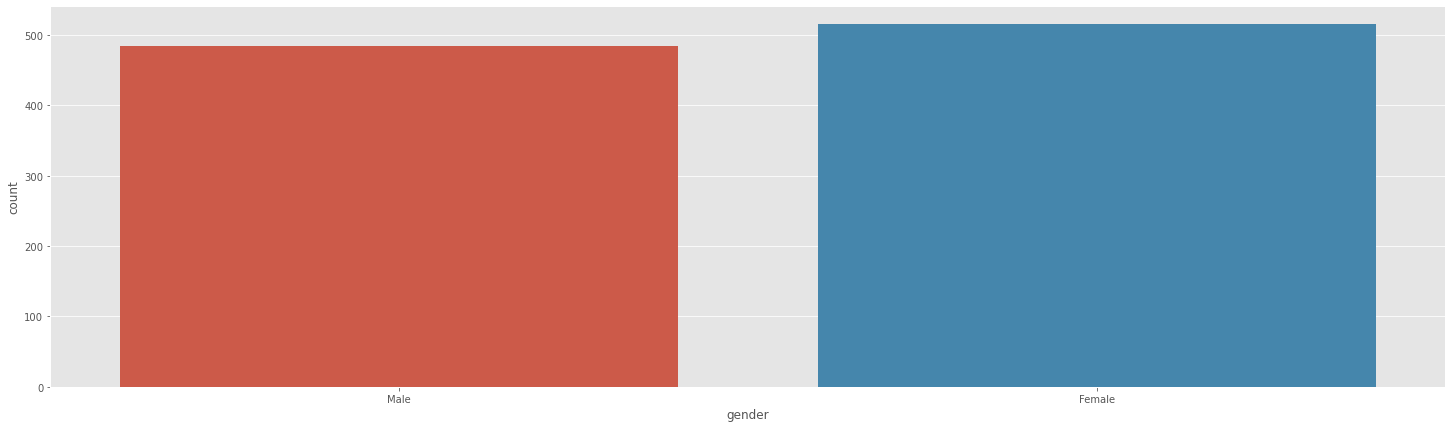

In [6]:
plt.rcParams["figure.figsize"] = (25, 7)
plt.style.use('ggplot')

sns.countplot(x = df["gender"])
plt.show()

### 3. AGE

The age seem to follow normal distribution, if taken from the whole population, but a skewed one if taken of the sample of population. However, age cannot be a negative number which is allowed by Normal distribution. [] With this in mind, I've decided to use the Normal distribution but set the range to avoid the mentioned. The avarage age in Ireland in 2020. was 38.2. [7] The age range was set to be 18 to 100.

In [7]:
# Generating age using normal distribution (but clipping the data) [2]
age = []
for i in range(1000):
    a = np.clip(np.random.normal(38.2, 15), 18, 100)
    age.append(int(a))
df["age"] = age
# Current dataset
df.head()

,gender,age
0,Male,38
1,Male,28
2,Female,18
3,Male,50
4,Female,39


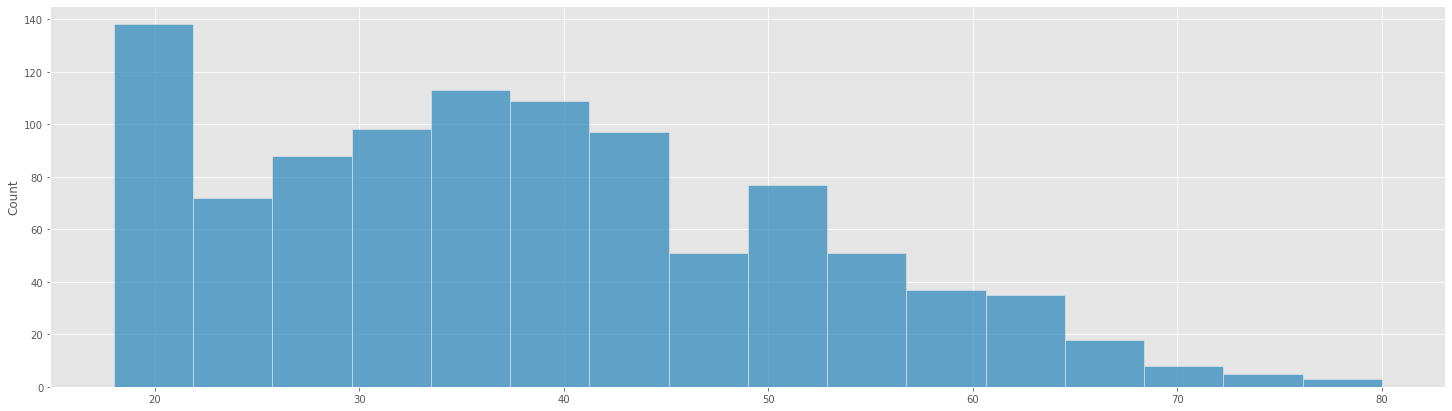

In [8]:
sns.histplot (age)
plt.show()

### 4. HEIGHT, WEIGHT AND ALCOHOL CONUSMPTION

Both height and weight are normally distributed. There is also a strong relationship between height and weight. As height increases, weight also tends to increase. [8] The avarage male height is 1.79m and weiht is 89.2kg. Avarage female height is 1.64m and avarage weight is 73.1kg. [9]  Both variables are generated at the same time, with set correlation between them. They are also generated separately for each gender.

<AxesSubplot:ylabel='Density'>

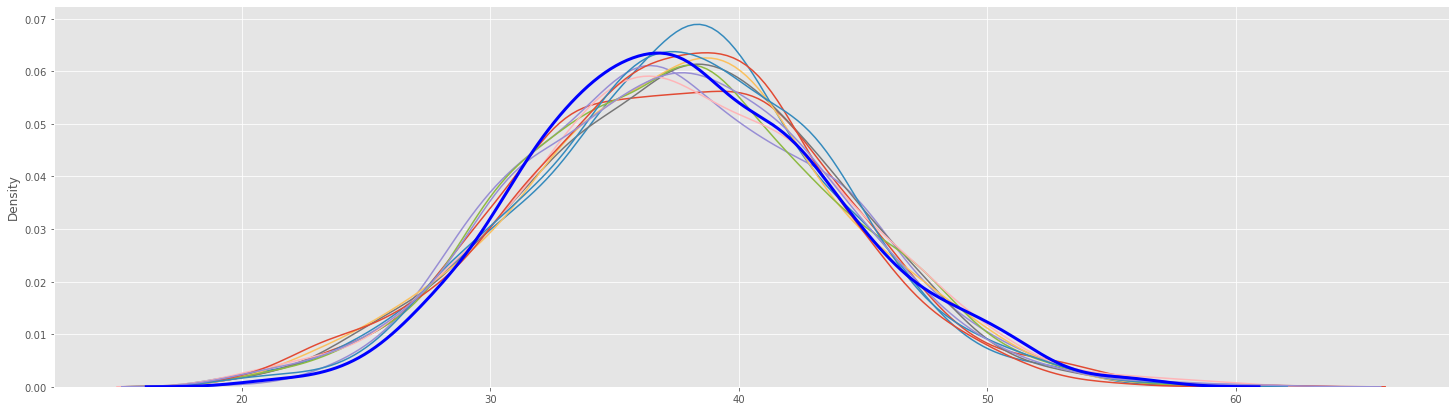

In [28]:
for seed in range (10):
    rng = np.random.default_rng(seed)

    n = []
    for i in range(1000):
        a = np.clip(np.random.normal(37.5, 6.3), 20, 100)
        n.append((a))
    sns.kdeplot(n, alpha = 0.7)
m = rng.gamma(38.57,0.98, 1000)
sns.kdeplot (m, linewidth = 3, color = "b")

In [10]:
# Defining a function.
def applyFunc(s):
    if s == "Male": # If male.
        # Create an array of height and weight.
        m_means = [179, 85, 38.57] # mean for height and weight.
        m_stds = [5, 5, 5] #standard deviation
        m_corr = 0.6 # correlation
        m_pcorr = 0.3
        m_ncorr = 0.1
        m_covs = [[m_stds[0]**2, m_stds[0]*m_stds[1]*m_corr, m_stds[0]*m_stds[2]*m_ncorr], 
                [m_stds[0]*m_stds[1]*m_corr, m_stds[1]**2, m_stds[1]*m_stds[2]*m_pcorr ],
                [m_stds[0]*m_stds[2]*m_ncorr, m_stds[1]*m_stds[2]*m_pcorr, m_stds[2]**2 ]]
        m_data = rng.multivariate_normal(m_means, m_covs)       
        m_data = m_data.round(1)
        return m_data[0], m_data[1], m_data[2]
    if s == "Female": # If female.
         # Create an array of height and weight.
        f_means = [164, 65, 15] # mean for height and weight.
        f_stds = [5, 5, 5] #standard deviation
        f_corr = 0.6 # correlation
        f_ncorr = 0.1
        f_pcorr = 0.3
        f_covs = [[f_stds[0]**2, f_stds[0]*f_stds[1]*f_corr, f_stds[0]*f_stds[2]*f_ncorr], 
                [f_stds[0]*f_stds[1]*f_corr, f_stds[1]**2, f_stds[1]*f_stds[2]*f_pcorr ],
                [f_stds[0]*f_stds[2]*f_ncorr, f_stds[1]*f_stds[2]*f_pcorr, f_stds[2]**2 ]] 
        f_data = rng.multivariate_normal(f_means, f_covs)       
        f_data = f_data.round(1)
        return f_data[0], f_data[1], f_data[2]

# Create an array based on gender
height_weight = df["gender"].apply(applyFunc)
# Assign array elements [3]
df["height"]= height_weight.str[0]
df["weight"]= height_weight.str[1]
df["alcohol_con"]= height_weight.str[2]
# Current dataset
df.head()

,gender,age,height,weight,alcohol_con
0,Male,38,178.0,82.7,39.4
1,Male,28,176.7,77.1,26.9
2,Female,18,165.6,59.2,9.8
3,Male,50,183.7,86.7,49.7
4,Female,39,163.0,67.6,25.1


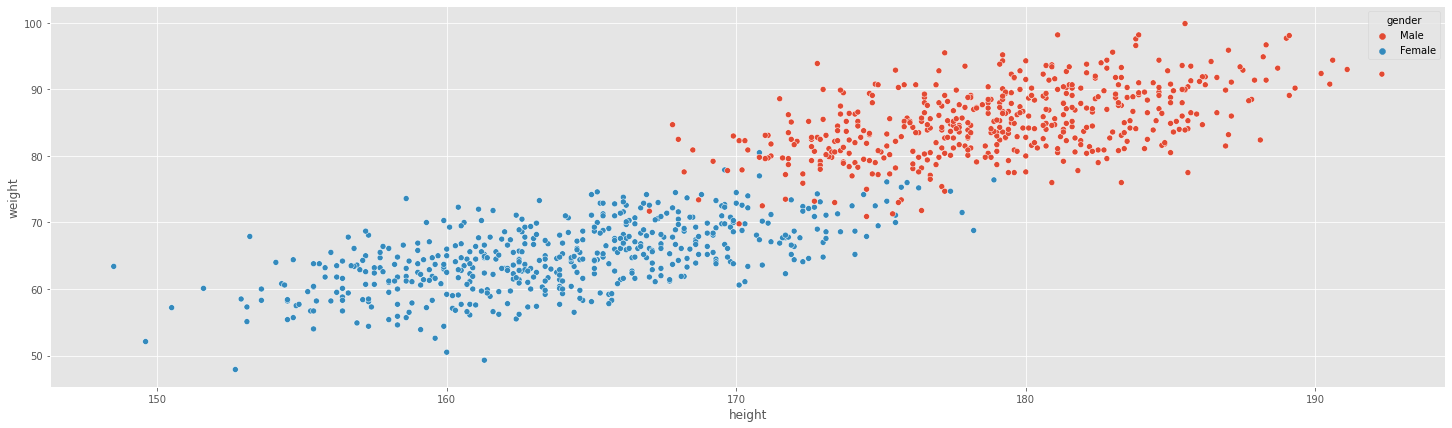

In [11]:
sns.scatterplot (x = df["height"], y = df["weight"], hue = df["gender"])
plt.show()

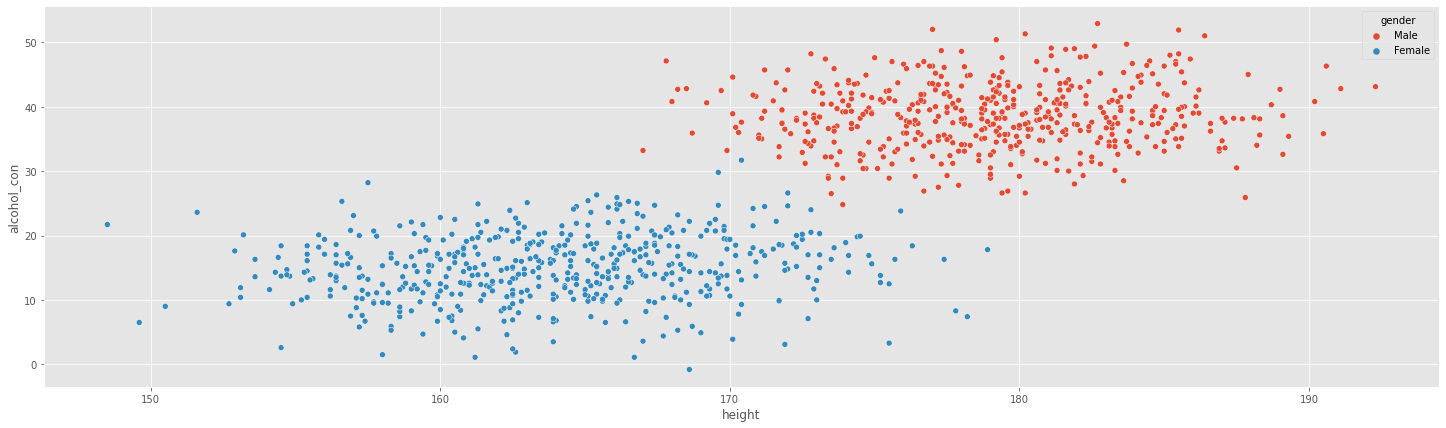

In [12]:
sns.scatterplot (x = df["height"], y = df["alcohol_con"], hue = df["gender"])
plt.show()

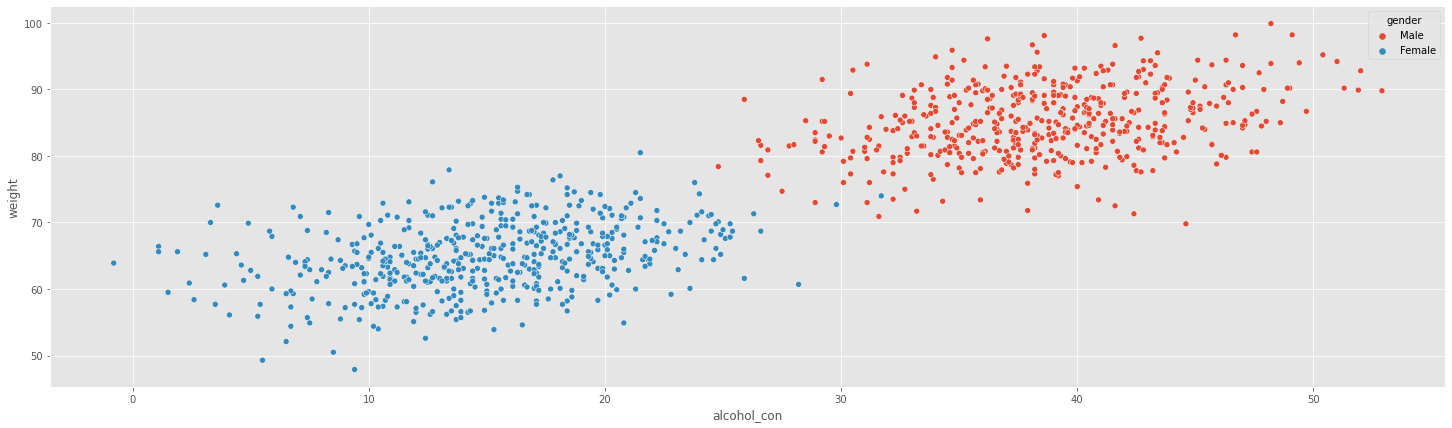

In [13]:
sns.scatterplot (x = df["alcohol_con"], y = df["weight"], hue = df["gender"])
plt.show()

### BMI

In [14]:
df["bmi"] = (df["weight"] / ((df["height"])/100)**2).round(1)
df.head()

,gender,age,height,weight,alcohol_con,bmi
0,Male,38,178.0,82.7,39.4,26.1
1,Male,28,176.7,77.1,26.9,24.7
2,Female,18,165.6,59.2,9.8,21.6
3,Male,50,183.7,86.7,49.7,25.7
4,Female,39,163.0,67.6,25.1,25.4


### BMI CLASSIFICATION

In [15]:
def applyFunc(s):
    if s <18.5:
        return "Underweight"
    elif s >=18.5 and s <25:
        return "Healthy weight"
    elif s >=25 and s <30:
        return "Overweight"
    elif s >=30 and s <40:
        return "Obese"
df["bmi_class"] = df["bmi"].apply(applyFunc)
df["bmi_class"].value_counts()

Overweight        566
Healthy weight    428
Obese               6
Name: bmi_class, dtype: int64

In [16]:
df

,gender,age,height,weight,alcohol_con,bmi,bmi_class
0,Male,38,178.0,82.7,39.4,26.1,Overweight
1,Male,28,176.7,77.1,26.9,24.7,Healthy weight
2,Female,18,165.6,59.2,9.8,21.6,Healthy weight
3,Male,50,183.7,86.7,49.7,25.7,Overweight
4,Female,39,163.0,67.6,25.1,25.4,Overweight
...,...,...,...,...,...,...,...
995,Male,20,183.2,88.0,41.0,26.2,Overweight
996,Male,28,182.4,92.0,36.9,27.7,Overweight
997,Female,53,162.5,64.1,10.9,24.3,Healthy weight
998,Male,38,184.4,91.0,46.4,26.8,Overweight


<AxesSubplot:xlabel='bmi_class', ylabel='count'>

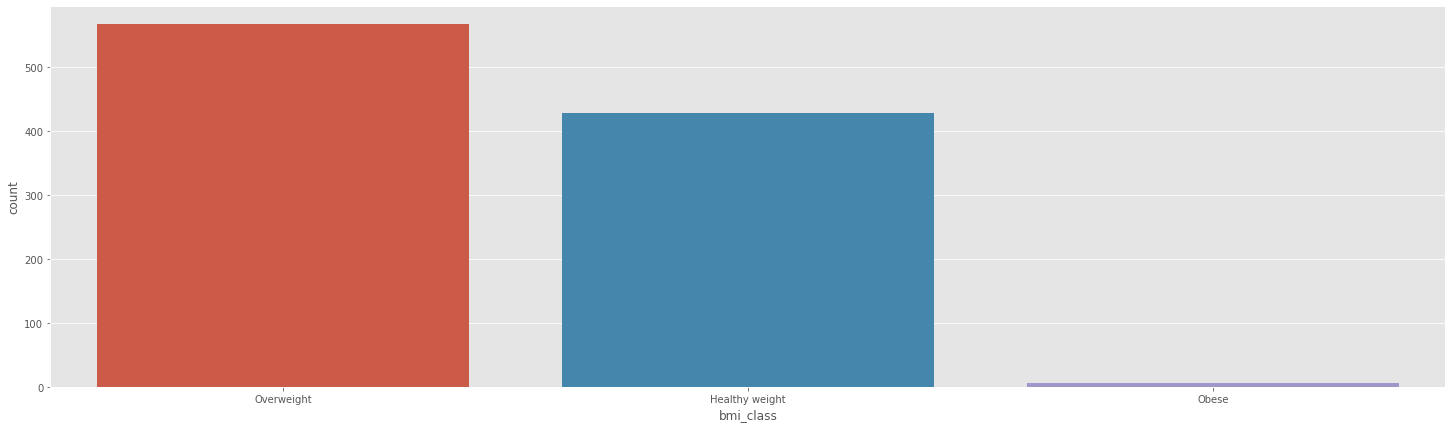

In [17]:
sns.countplot (x = df["bmi_class"])

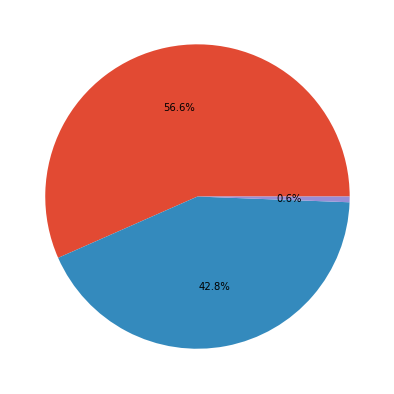

In [18]:
count = df["bmi_class"].value_counts()
plt.pie(count, autopct='%1.1f%%')
plt.show()

### NAMES

In [19]:
rand_name = names.get_full_name(gender='male')

In [20]:
def applyFunc(s):
    if s == "Male":
        male_name = names.get_full_name(gender='male')
        return male_name
    elif s == "Female":
        female_name = names.get_full_name(gender='female')
        return female_name
names = df["gender"].apply(applyFunc)
df.insert(0, "name", names)

In [21]:
df

,name,gender,age,height,weight,alcohol_con,bmi,bmi_class
0,Jack Woods,Male,38,178.0,82.7,39.4,26.1,Overweight
1,Charles Rangel,Male,28,176.7,77.1,26.9,24.7,Healthy weight
2,Kathleen Wood,Female,18,165.6,59.2,9.8,21.6,Healthy weight
3,Peter Rochin,Male,50,183.7,86.7,49.7,25.7,Overweight
4,Suzanne Smith,Female,39,163.0,67.6,25.1,25.4,Overweight
...,...,...,...,...,...,...,...,...
995,Leo Cain,Male,20,183.2,88.0,41.0,26.2,Overweight
996,John Hazard,Male,28,182.4,92.0,36.9,27.7,Overweight
997,Angela Hughes,Female,53,162.5,64.1,10.9,24.3,Healthy weight
998,John Snyder,Male,38,184.4,91.0,46.4,26.8,Overweight


In [22]:
df.describe()

,age,height,weight,alcohol_con,bmi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,38.029000,171.312700,74.753700,26.412000,25.322500
std,13.630405,9.084294,11.338444,12.887461,1.941245
min,18.000000,148.500000,47.900000,-0.800000,18.900000
25%,27.000000,163.900000,64.675000,14.800000,23.900000
50%,37.000000,171.800000,73.250000,24.700000,25.300000
75%,47.000000,179.000000,84.625000,38.200000,26.700000
max,80.000000,192.300000,99.900000,52.900000,31.400000


<AxesSubplot:xlabel='alcohol_con', ylabel='Count'>

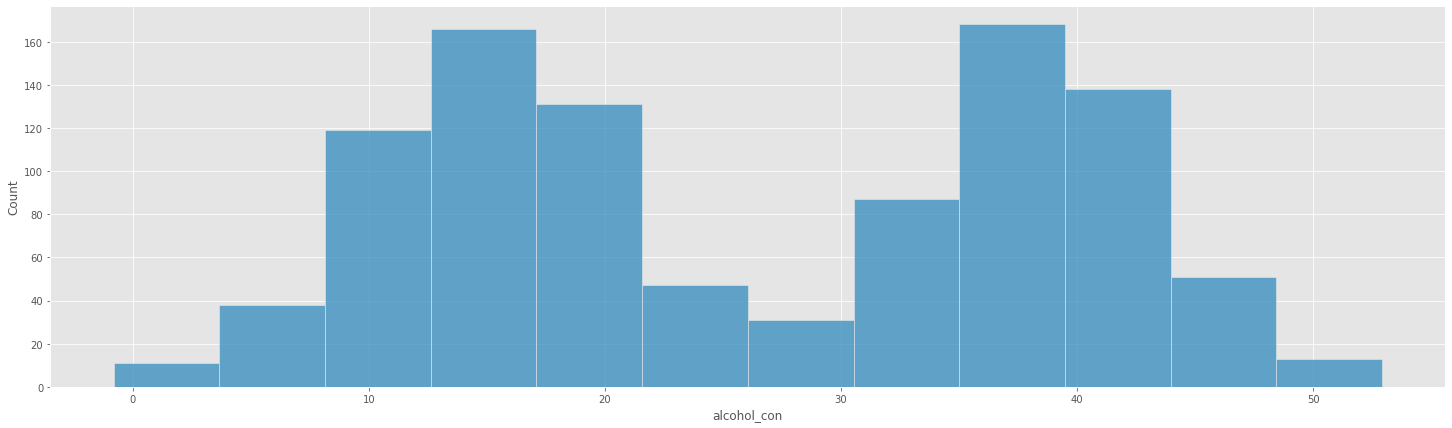

In [26]:
sns.histplot (data = df["alcohol_con"])

## REFERENCES

### MAIN

- [1] https://en.wikipedia.org/wiki/Body_mass_index
- [2] https://www.hindawi.com/journals/tswj/2012/849018/
- [3] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4338356/
- [4] https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6484200/
- [5] https://builtin.com/data-science/data-types-statistics
- [6] https://data.worldbank.org/indicator/SP.POP.TOTL.FE.ZS?locations=IE
- [7] https://www.worldometers.info/world-population/ireland-population/
- [8] https://statisticsbyjim.com/basics/correlations/
- [9] https://www.worlddata.info/average-bodyheight.php
- [10] https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Glossary:Body_mass_index_(BMI)

### CODE

- [1] https://moonbooks.org/Articles/How-to-generate-random-names-first-and-last-names-with-python-/
- [2] https://stackoverflow.com/questions/18441779/how-to-specify-upper-and-lower-limits-when-using-numpy-random-normal
- [3] https://stackoverflow.com/questions/29550414/how-can-i-split-a-column-of-tuples-in-a-pandas-dataframe
- [4]
- [5] https://stackoverflow.com/questions/18683821/generating-random-correlated-x-and-y-points-using-numpy


OTHER


AGE
- https://stats.stackexchange.com/questions/129417/if-my-histogram-shows-a-bell-shaped-curve-can-i-say-my-data-is-normally-distrib
- http://www.talkstats.com/threads/can-age-be-treated-as-normally-distributed.11875/

### IMAGES

- https://i2.wp.com/www.sarahwilkins.net/wp-content/uploads/2015/03/sarah-wilkins-wine-1.jpg